In [36]:
# fonction
import sys
sys.path.append(r"C:\Users\franc\Desktop\FORMATION\DATA_SCIENCE\ML_PRO\DOC")
from perso import *



# **LIBRAIRIES**

In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,validation_curve,GridSearchCV
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score


## **LOAD DATA**

In [38]:
data= load_breast_cancer()

X=data.data
y=data.target

print(data.feature_names)
print(f"{X.shape = }")
print("y= ", np.unique(y,return_counts=True))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
X.shape = (569, 30)
y=  (array([0, 1]), array([212, 357]))


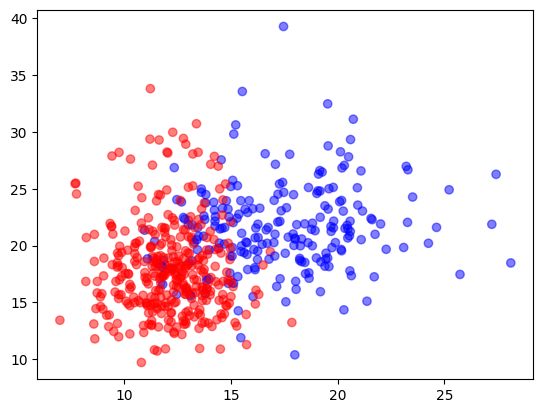

In [39]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5,cmap="bwr")

## **TRAIN TEST SPLIT**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"X_train.shape={X_train.shape}")
print(f"X_test.shape={X_test.shape}")
print(f"y_train.shape={y_train.shape}")
print(f"y_test.shape={y_test.shape}")

X_train.shape=(455, 30)
X_test.shape=(114, 30)
y_train.shape=(455,)
y_test.shape=(114,)


In [41]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9494505494505494
Test Accuracy: 0.9385964912280702


## **EVALUATION PAR VALIDATION CROISEE**

In [42]:
cv_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="accuracy"
)

print(f"Scores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

Scores de validation croisée : [0.95604396 0.89010989 0.9010989  0.92307692 0.93406593]
Moyenne des scores de validation croisée : 0.9208791208791209


## **RECHERHCE DU MEILLEUR HYPER-PARAM**

In [43]:
k_scores={}
nbr_mod_var=50

for k in range(1,nbr_mod_var):
    model =KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
    k_scores[k]=float(cv_scores.mean())

max_score=max(k_scores.values())
index_max_score= max(k_scores, key=k_scores.get)

print(f"la valeur max du score est {max_score} et cela  pour  {index_max_score} voisin")


la valeur max du score est 0.9362637362637363 et cela  pour  9 voisin


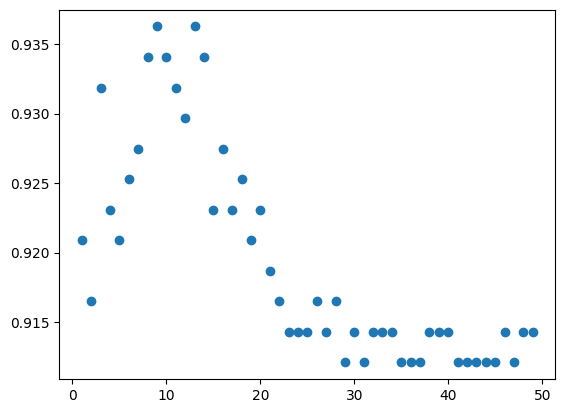

In [53]:
plt.scatter(k_scores.keys(),k_scores.values())

## **METHODE DIIRECT**

In [46]:
train_scores,validation_scores = validation_curve( estimator=model,
                                                    X=X_train,
                                                    y=y_train,
                                                    cv=10,
                                                    param_name='n_neighbors',
                                                    param_range=range(1,50),
                                                    scoring="accuracy",
)

In [47]:
nbr_mod_var= 100
param_grid = {'n_neighbors': range(1, 50)}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

Best parameters: {'n_neighbors': 9}
Best cross-validated accuracy: 0.9362637362637363


In [48]:
validation_scores.shape

(49, 10)

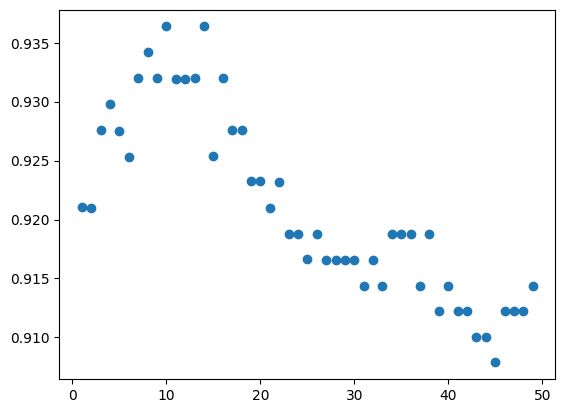

In [49]:
mean_scores=validation_scores.mean(axis=1)
plt.scatter(range(1,50),mean_scores)

In [54]:
param_distrubtion = {
    "n_neighbors": range(1, 20),
    "metric": ["minkowski", "cosine", "euclidean"]
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring="accuracy")
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=49),
                   param_distributions={'metric': ['minkowski', 'cosine',
                                                   'euclidean'],
                                        'n_neighbors': range(1, 20)},
                   scoring='accuracy')

In [ ]:
param_grid = {
    "n_neighbors": range(1, 20),
    "metric": ["minkowski", "cosine", "euclidean"]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

In [59]:
pd.DataFrame(grid_search.cv_results_).head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001390,0.000927,0.009876,0.000617,minkowski,1,"{'metric': 'minkowski', 'n_neighbors': 1}",0.945055,0.890110,0.901099,0.945055,0.923077,0.920879,0.022413,34
1,0.000892,0.000068,0.008308,0.001048,minkowski,2,"{'metric': 'minkowski', 'n_neighbors': 2}",0.923077,0.901099,0.890110,0.934066,0.934066,0.916484,0.017855,50
2,0.000889,0.000236,0.008937,0.000824,minkowski,3,"{'metric': 'minkowski', 'n_neighbors': 3}",0.956044,0.901099,0.901099,0.945055,0.956044,0.931868,0.025441,11
3,0.001004,0.000309,0.007695,0.000491,minkowski,4,"{'metric': 'minkowski', 'n_neighbors': 4}",0.945055,0.890110,0.901099,0.934066,0.945055,0.923077,0.023051,27
4,0.000791,0.000117,0.008426,0.001044,minkowski,5,"{'metric': 'minkowski', 'n_neighbors': 5}",0.956044,0.890110,0.901099,0.923077,0.934066,0.920879,0.023466,34


In [66]:
params = grid_search.cv_results_["params"]
scores= grid_search.cv_results_["mean_test_score"]

grid_search_results = pd.DataFrame(params)
grid_search_results['score']=scores



In [68]:
grid_search_results.head()

,metric,n_neighbors,score
0,minkowski,1,0.920879
1,minkowski,2,0.916484
2,minkowski,3,0.931868
3,minkowski,4,0.923077
4,minkowski,5,0.920879


In [72]:
grid_search_heatmap=grid_search_results.pivot(index='n_neighbors',columns='metric',values='score')

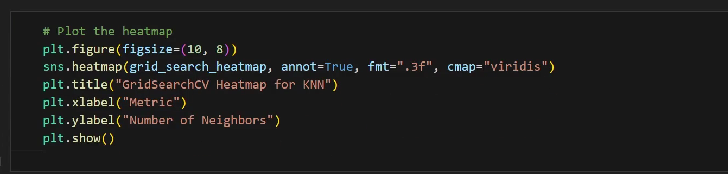

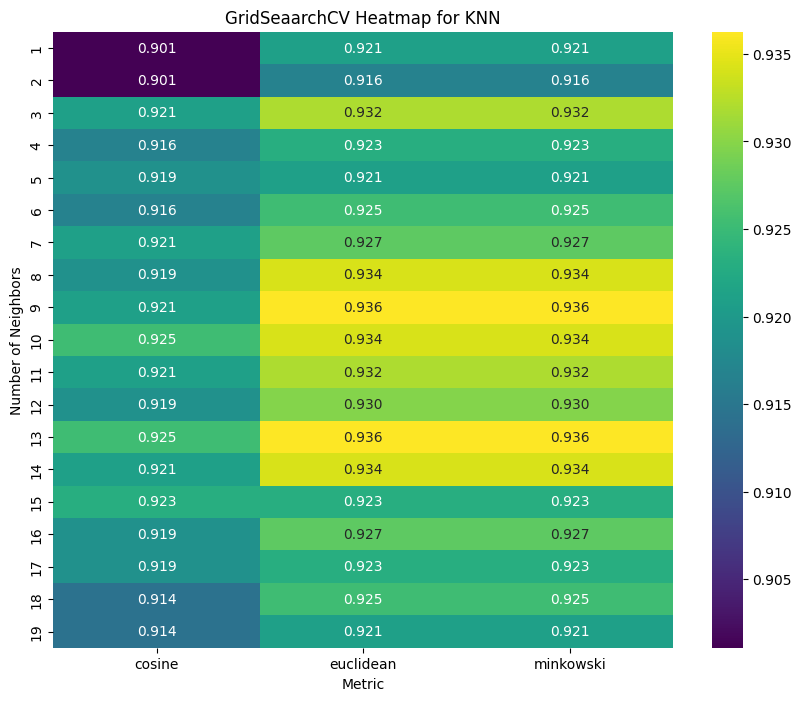

In [76]:
#plot the heatmap

plt.figure(figsize=(10,8))
sns.heatmap(grid_search_heatmap, annot=True, fmt=".3f", cmap='viridis')
plt.title("GridSeaarchCV Heatmap for KNN")
plt.xlabel("Metric")
plt.ylabel("Number of Neighbors")
plt.show()

In [77]:
print(f"Meilleurs parametres: {grid_search.best_params_}")
print(f"Meilleur score: {grid_search.best_score_}")

Meilleurs parametres: {'metric': 'minkowski', 'n_neighbors': 9}
Meilleur score: 0.9362637362637363


In [81]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)
test_accuracy=accuracy_score(y_test,y_pred)

print(f"Accuracy sur le de test est  : {test_accuracy}")

Accuracy sur le de test est  : 0.9649122807017544
